In [1]:
import h5py
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [4]:
def initialize_param(layerd_dims):
    np.random.seed(1)
    parameters={}
    L=len(layerd_dims)

    for i in range(1,L):
        parameters["W"+str(i)]=np.random.randn(layerd_dims[i],layerd_dims[i-1])*0.01 
        
        parameters["b"+str(i)]=np.zeros((layerd_dims[i],1))
        assert parameters["W"+str(i)].shape==(layerd_dims[i],layerd_dims[i - 1])
        assert parameters["b"+str(i)].shape==(layerd_dims[i],1)
    return parameters

In [5]:
#Z=transpose of W *x+b

def sigmoid(Z):
    A=1/(1+np.exp(-Z))
    return A,Z

def tanh(Z):
    A=np.tanh(Z)
    return A,Z

def relu(Z):
    A=np.maximum(0,Z)
    return A,Z
 
def leaky_relu(Z):
    A=np.maximum(0.01*Z,Z)
    return A,Z


In [6]:
#ploting activation function

In [15]:
z=np.linspace(-10,10,100)

In [16]:
#computes post-activation outputs


A_sigmoid,z=sigmoid(z)
A_tanh,z=tanh(z)
A_relu,z=relu(z)
A_leaky_relu,z=leaky_relu(z)

In [17]:
#plotting all the activaiton function

Text(0.5, 1.0, 'sigmoid function')

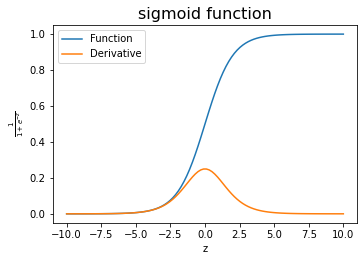

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(z,A_sigmoid,label="Function")
plt.plot(z, A_sigmoid * (1- A_sigmoid),label="Derivative")
plt.legend(loc="upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{1}{1+e^{-z}}$")
plt.title("sigmoid function",fontsize=16)

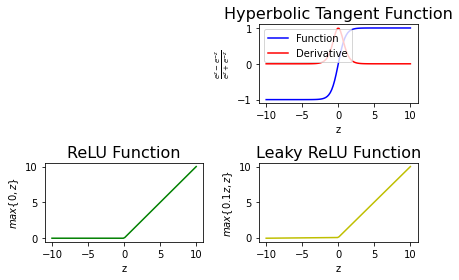

In [25]:
# Plot tanh
plt.subplot(2, 2, 2)
plt.plot(z, A_tanh, 'b', label = "Function")
plt.plot(z, 1 - np.square(A_tanh), 'r',label="Derivative") 
plt.legend(loc="upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{e^z - e^{-z}}{e^z + e^{-z}}$") 
plt.title("Hyperbolic Tangent Function", fontsize=16)
# plot relu
plt.subplot(2, 2, 3)
plt.plot(z, A_relu, 'g')
plt.xlabel("z")
plt.ylabel(r"$max\{0, z\}$")
plt.title("ReLU Function", fontsize=16)
# plot leaky relu
plt.subplot(2, 2, 4)
plt.plot(z, A_leaky_relu, 'y')
plt.xlabel("z")
plt.ylabel(r"$max\{0.1z, z\}$")
plt.title("Leaky ReLU Function", fontsize=16)
plt.tight_layout();

In [26]:
#Define helper function that will be used in L-mdel forward prop

def liner_forward(A_prev,W,b):
    Z=np.dot(W,A_prev)+b
    cache=(A_prev,W,b)
    return Z,cache


def linear_Activaiton_forward(A_prev,W,b,activation_fn):
    assert activation_fn == "sigmoid"  or activation_fn == "tanh"  or activation_fn == "relu"
    
    if activation_fn == "sigmoid":
        Z , linear_cache =  liner_forward(A_prev, W, b)
        A,activation_cache = sigmoid(Z)
    elif activation_fn == "tanh":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)

    elif activation_fn == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    assert A.shape == (W.shape[0] , A_prev.shape[1])


    cache=(linear_cache , activation_cache)   

    return A , cache
    
     


In [29]:
def L_model_forward(X,parameters,hidden_layers_actiation_fn="relu"):
    A = X
    caches=[]

    L=len(parameters) // 2

    for l in range(1,L):
        A, cache = linear_Activaiton_forward(A_prev,parameters["W" + str(l)],parameters["b"+str(l)],activation_fn = hidden_layers_actiation_fn)
        caches.append(cache)
    

    AL,cache = linear_Activaiton_forward(A,parameters["W" + str(L)], parameters["b" + str(L)], activation_fn="sigmoid")
    caches.append(cache)


    assert AL.shape == (1,X.shape[1])
    return AL , caches


In [ ]:
#Cost
#We’ll use the binary##Cross-Entropy## cost. It uses the log-likelihood method to estimate its error. The cost is: The above cost function is convex; however, neural network usually stuck on a local minimum and is not guaranteed to find the optimal parameters. We’ll use here gradient-based learning.

In [30]:
#compute cross-entropy cost


def compute_cost(AL,y):
    m = y.shape[1]
    cost = - (1 / m )* np.sum(np.multiply(y, np.log(AL)) + np.multiply(1 - y , np.log(1 - AL)))
    return cost

In [31]:
#backpropogation

In [32]:
def sigmoid_gradient(dA,Z):
    A , Z =sigmoid(Z)
    dZ = dA * A * (1 - A)
    
    return dZ


def tanh_gradient(dA, Z):
    A, Z = tanh(Z)
    dZ = dA * (1 - np.square(A))

    return dZ

def relu_gradient(dA, Z):
    A, Z = relu(Z)
    dZ = np.multiply(dA, np.int64(A > 0))

    return dZ

In [33]:
def linear_backword(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert dA_prev.shape == A_prev.shape
    assert dW.shape == W.shape
    assert db.shape == b.shape

    return dA_prev, dW, db


def linear_activation_backward(dA, cache, activation_fn):
    linear_cache, activation_cache = cache

    if activation_fn == "sigmoid":
        dZ = sigmoid_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "tanh":
        dZ = tanh_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    elif activation_fn == "relu":
        dZ = relu_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    return dA_prev, dW, db


def L_model_backward(AL, y, caches, hidden_layers_activation_fn="relu"):
    y = y.reshape(AL.shape)
    L = len(caches)
    grads = {}

    dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))

    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads[
        "db" + str(L)] = linear_activation_backward(
            dAL, caches[L - 1], "sigmoid")

    for l in range(L - 1, 0, -1):
        current_cache = caches[l - 1]
        grads["dA" + str(l - 1)], grads["dW" + str(l)], grads[
            "db" + str(l)] = linear_activation_backward(
                grads["dA" + str(l)], current_cache,
                hidden_layers_activation_fn)


In [34]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters[
            "W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters[
            "b" + str(l)] - learning_rate * grads["db" + str(l)]
    return parameters